In [783]:
# Importamos librerías a utilizar
import pandas as pd
import numpy as np
import glob as glob
import os as os
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Herramientas de modelado
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

Información de atributos:<br>

Edad: Edad (años) de una mujer durante el embarazo.<br>
PASistólica: Valor superior de la Presión Arterial en mmHg, atributo significativo durante el embarazo.<br>
PA Diastólica: Valor más bajo de la Presión Arterial en mmHg, atributo significativo durante el embarazo.<br>
BS: Niveles de glucosa en sangre (se expresan en términos de una concentración molar, mmol/L).<br>
HeartRate: Frecuencia cardíaca normal en reposo (latidos por minuto).<br>
Nivel de Riesgo: Nivel de riesgo predicho durante el embarazo considerando los atributos anteriores.<br>

In [784]:
#Leemos las primeras columnas del dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv',sep=',')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [785]:
#Información sobre atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [786]:
# Leemos las primeras 5 columnas
df.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
558,45,120,95,7.5,98.0,66,low risk
67,19,120,80,7.0,98.0,70,mid risk
63,29,90,70,6.7,98.0,80,mid risk
111,38,135,60,7.9,101.0,86,high risk
457,23,130,70,6.8,98.0,78,mid risk


In [787]:
#Descripción del dataframe (no contiene registros nulos)
data_describe = pd.DataFrame(round(df.isnull().sum() /df.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = df.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = df.isnull().sum()
values= []
example=[]
for x in df:
    values.append(len(df[x].unique()))
    example.append(df[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,int64,0.0,0,50,"[25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 5..."
SystolicBP,int64,0.0,0,19,"[130, 140, 90, 120, 85, 110, 70, 100, 75, 95, ..."
DiastolicBP,int64,0.0,0,16,"[80, 90, 70, 85, 60, 89, 75, 100, 50, 65, 95, ..."
BS,float64,0.0,0,29,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.0,0,8,"[98.0, 100.0, 102.0, 101.0, 103.0, 98.4, 99.0,..."
HeartRate,int64,0.0,0,16,"[86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 7..."
RiskLevel,object,0.0,0,3,"[high risk, low risk, mid risk]"


#### EN  PRIMER LUGAR DEBEMOS DE  TENER  LOS VALORES SELECCIONADOS  CRITERIOSAMENTE  VALORADOS  POR UN PROFESIONAL DE LA  SALUD A FIN DE ESTABLECER MAXIMOS Y MINIMOS. 

In [788]:
#Leemos las primeras columnas del dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv',sep=',')



#df.head(20)
#df.DiastolicBP.value_counts(normalize=True)
#df.SystolicBP.value_counts(normalize=True)

In [789]:
#PASAMOS LA  TEMPERATURA FAHRENHEIT
df['BodyTemp']=round((((df['BodyTemp']-32)*5)/9),2)

In [790]:
#EDAD >11 Y < 50
Age_mask = (df['Age']<=50) & (df['Age']>=11)
df['Age']=df.Age[Age_mask]


In [791]:
#Pas SystolicBP 

SystolicBP_mask = df['SystolicBP']>= 90  & (df['SystolicBP']<= 240)
df['SystolicBP']=df.SystolicBP[SystolicBP_mask]


In [792]:
#Pad DiastolicBP
DiastolicBP_mask= (df['DiastolicBP']<=120) & (df['DiastolicBP']>=60)
df['DiastolicBP']=df.DiastolicBP[DiastolicBP_mask]

In [793]:
#BS Nivel de Glucosa en Sangre
BS_mask = (df['BS']<=49.0) & (df['BS']>=3.3)
df['BS']=df.BS[BS_mask]

In [794]:
BodyTemp_mask = (df['BodyTemp']<=41)&   (df['BodyTemp']>=36)
df['BodyTemp']=df.BodyTemp[BodyTemp_mask]

In [795]:
#Frecuencia Cardiaca
HeartRate_mask = (df['HeartRate']<=100) & (df['HeartRate'] >=60)
df['HeartRate']=df.HeartRate[HeartRate_mask]

In [796]:
#Descripción del dataframe (no contiene registros nulos)
data_describe = pd.DataFrame(round(df.isnull().sum() /df.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = df.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = df.isnull().sum()
values= []
example=[]
for x in df:
    values.append(len(df[x].unique()))
    example.append(df[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,float64,0.10,99,39,"[25.0, 35.0, 29.0, 30.0, 23.0, 32.0, 42.0, 19...."
SystolicBP,int64,0.00,0,19,"[130, 140, 90, 120, 85, 110, 70, 100, 75, 95, ..."
DiastolicBP,float64,0.05,49,15,"[80.0, 90.0, 70.0, 85.0, 60.0, 89.0, 75.0, 100..."
BS,float64,0.00,0,29,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.00,0,8,"[36.67, 37.78, 38.89, 38.33, 39.44, 36.89, 37...."
HeartRate,float64,0.00,2,16,"[86.0, 70.0, 80.0, 76.0, 78.0, 77.0, 88.0, 90...."
RiskLevel,object,0.00,0,3,"[high risk, low risk, mid risk]"


In [797]:
df=df.dropna()

In [798]:
#Descripción del dataframe (no contiene registros nulos)
data_describe = pd.DataFrame(round(df.isnull().sum() /df.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = df.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = df.isnull().sum()
values= []
example=[]
for x in df:
    values.append(len(df[x].unique()))
    example.append(df[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,float64,0.0,0,38,"[25.0, 35.0, 29.0, 30.0, 23.0, 32.0, 42.0, 19...."
SystolicBP,int64,0.0,0,15,"[130, 140, 90, 120, 85, 110, 100, 95, 80, 115,..."
DiastolicBP,float64,0.0,0,14,"[80.0, 90.0, 70.0, 85.0, 60.0, 89.0, 75.0, 100..."
BS,float64,0.0,0,27,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.0,0,8,"[36.67, 37.78, 38.89, 38.33, 39.44, 36.89, 37...."
HeartRate,float64,0.0,0,15,"[86.0, 70.0, 80.0, 76.0, 78.0, 77.0, 88.0, 90...."
RiskLevel,object,0.0,0,3,"[high risk, low risk, mid risk]"


#### PASAR DE GRADOS FARANHEIT A CELSIUS

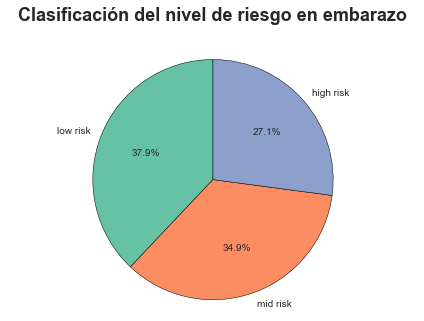

In [799]:
#Las clases están balanceadas en términos relativos
count=df["RiskLevel"].value_counts().tolist()

label=df["RiskLevel"].value_counts().index


plt.style.use('ggplot')



dic = dict(zip(label,count))

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]<0) else k):
     newdic[key] = sum([dic[i] for i in list(group)])   

labels = newdic.keys()
sizes = newdic.values()
colores = sns.color_palette('Set2')
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, colors=colores, autopct='%0.1f%%',wedgeprops={"edgecolor":"k"}, startangle=90)
ax.axis('equal')
plt.tight_layout()

# title
title = 'Clasificación del nivel de riesgo en embarazo\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')

plt.show()

In [800]:
#Cantidad de registros según el tipo de riesgo
dataframe_limpio_group_b_typ_class = df.groupby("RiskLevel").size().reset_index(name="Total")

print(dataframe_limpio_group_b_typ_class)
type(dataframe_limpio_group_b_typ_class)

   RiskLevel  Total
0  high risk    235
1   low risk    329
2   mid risk    303


pandas.core.frame.DataFrame

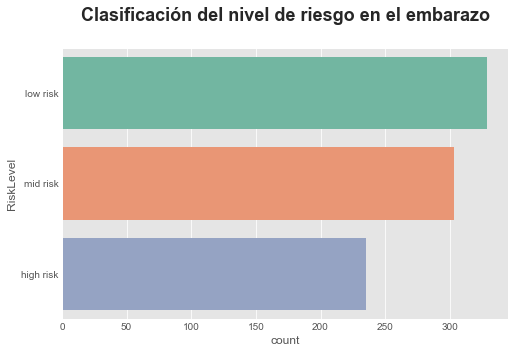

In [801]:
#Distribución de datos:

plt.figure(figsize=(8,5))

# title
title = 'Clasificación del nivel de riesgo en el embarazo\n'
plt.title(title, loc='center', fontsize=18, fontweight = 'bold')


plt.style.use('seaborn-darkgrid')
y= df.RiskLevel

ax = sns.countplot(y=y, orient="h",order=df['RiskLevel'].value_counts().index, palette='Set2')


plt.show()

In [802]:
#Descripción del dataframe (no contiene registros nulos)
data_describe = pd.DataFrame(round(df.isnull().sum() /df.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = df.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = df.isnull().sum()
values= []
example=[]
for x in df:
    values.append(len(df[x].unique()))
    example.append(df[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example

data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
Age,float64,0.0,0,38,"[25.0, 35.0, 29.0, 30.0, 23.0, 32.0, 42.0, 19...."
SystolicBP,int64,0.0,0,15,"[130, 140, 90, 120, 85, 110, 100, 95, 80, 115,..."
DiastolicBP,float64,0.0,0,14,"[80.0, 90.0, 70.0, 85.0, 60.0, 89.0, 75.0, 100..."
BS,float64,0.0,0,27,"[15.0, 13.0, 8.0, 7.0, 6.1, 7.01, 11.0, 6.9, 1..."
BodyTemp,float64,0.0,0,8,"[36.67, 37.78, 38.89, 38.33, 39.44, 36.89, 37...."
HeartRate,float64,0.0,0,15,"[86.0, 70.0, 80.0, 76.0, 78.0, 77.0, 88.0, 90...."
RiskLevel,object,0.0,0,3,"[high risk, low risk, mid risk]"


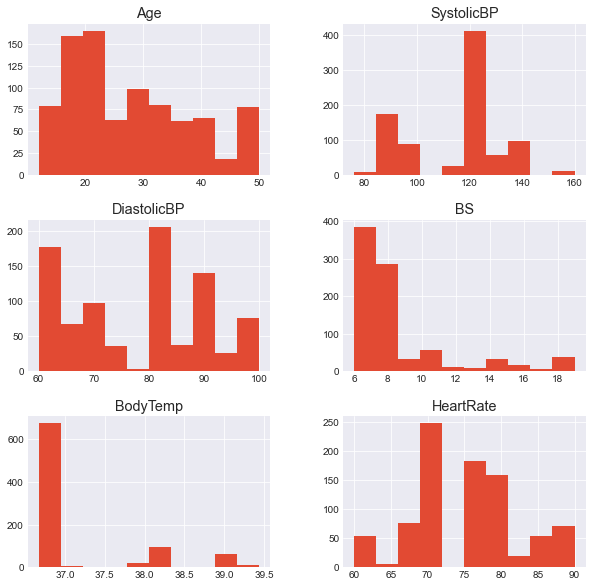

In [803]:
#Distribución de las features
df.hist(figsize=(10,10))
plt.show()

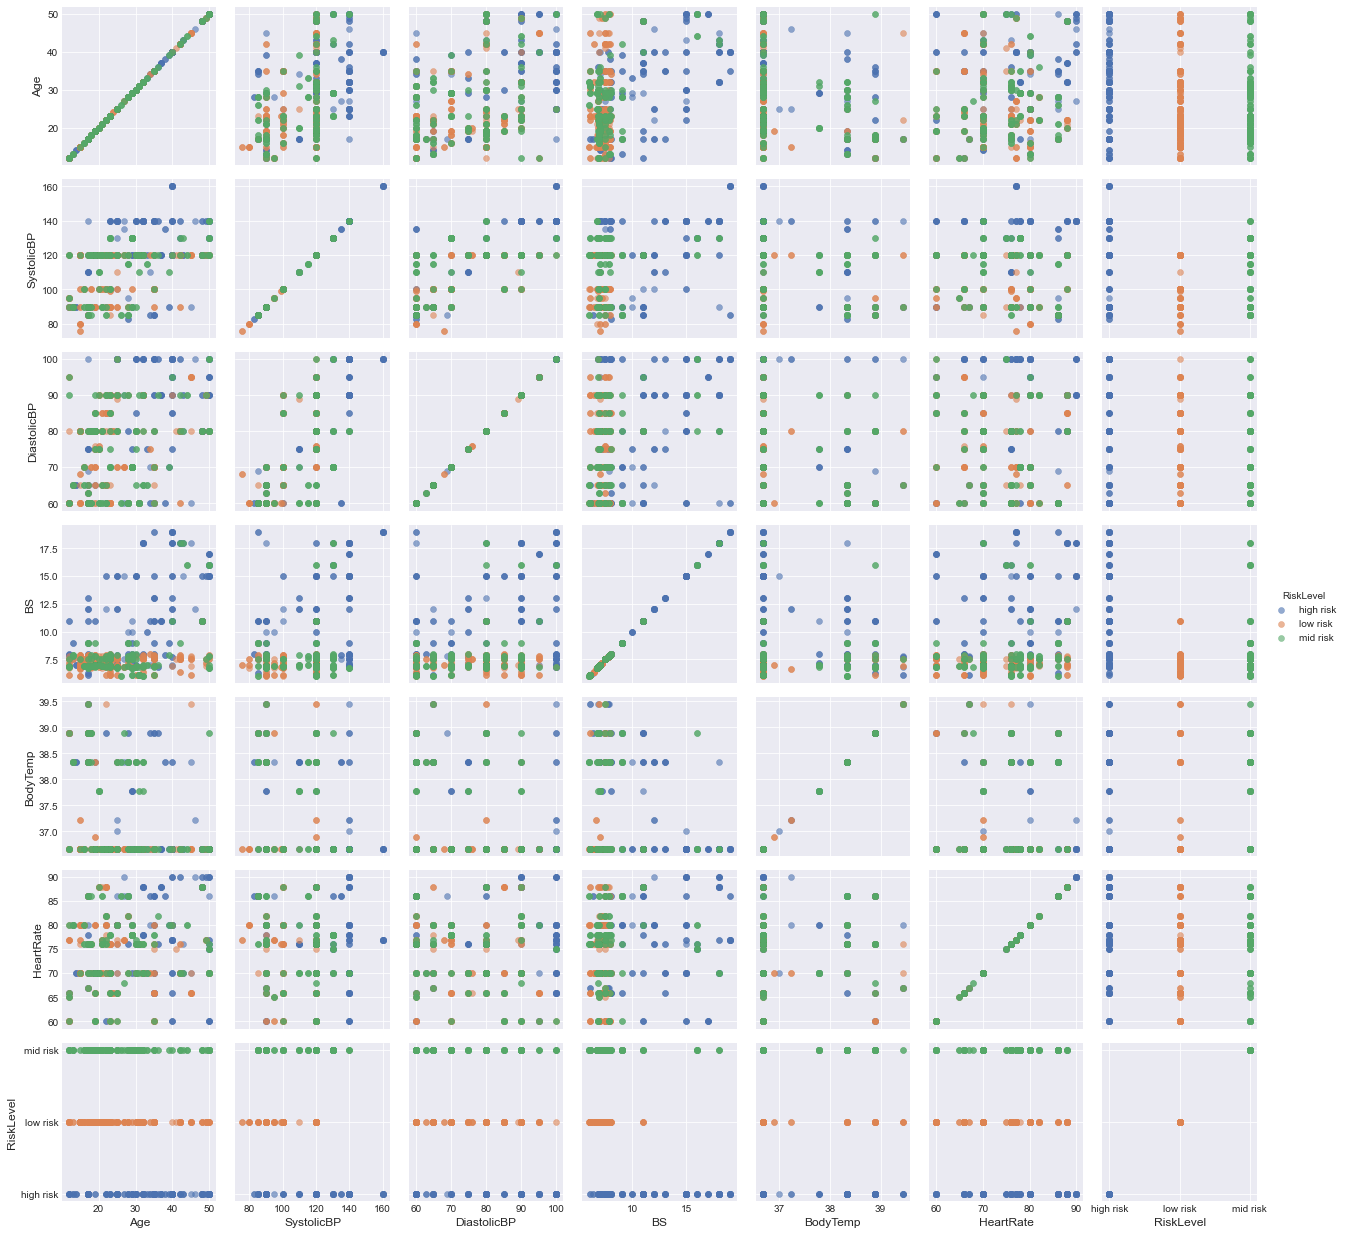

In [804]:
# variables correlacionadas
g = sns.PairGrid(df, vars=["Age","SystolicBP","DiastolicBP","BS","BodyTemp","HeartRate","RiskLevel"],
                 hue='RiskLevel', palette='deep')
#g = sns.PairGrid(data_suburb, vars=['Car', 'Rooms', 'Distance', 'Landsize', 'Price'],
#                 hue='Suburb', palette=palette_suburb)
g.map(plt.scatter, alpha=0.6)
g.add_legend();


<AxesSubplot:xlabel='RiskLevel', ylabel='Age'>

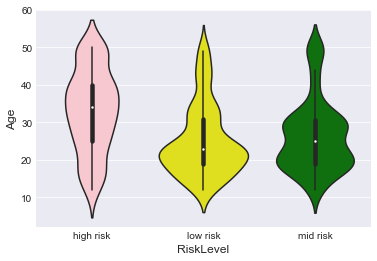

In [805]:
palette_maternity=["pink", "yellow", "green"]
sns.violinplot (x = "RiskLevel", y = "Age", data=df, palette = palette_maternity)


<AxesSubplot:xlabel='RiskLevel', ylabel='SystolicBP'>

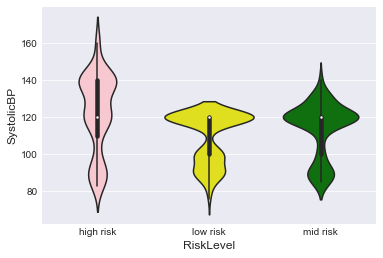

In [806]:
sns.violinplot (x = "RiskLevel", y = "SystolicBP", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='DiastolicBP'>

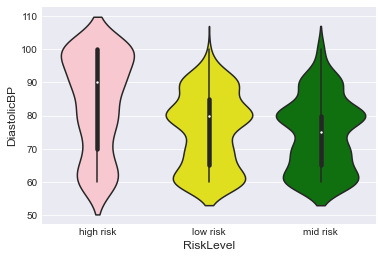

In [807]:
sns.violinplot (x = "RiskLevel", y = "DiastolicBP", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BodyTemp'>

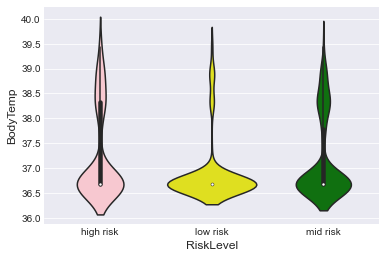

In [808]:
sns.violinplot (x = "RiskLevel", y = "BodyTemp", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

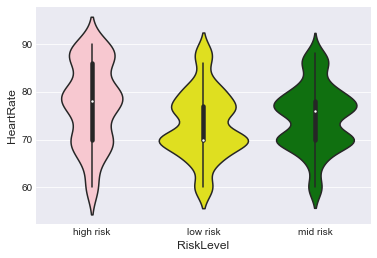

In [809]:
sns.violinplot (x = "RiskLevel", y = "HeartRate", data=df, palette = palette_maternity)


<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

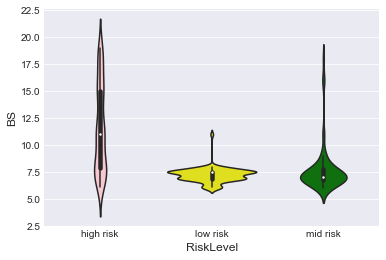

In [810]:
sns.violinplot (x = "RiskLevel", y = "BS", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BS'>

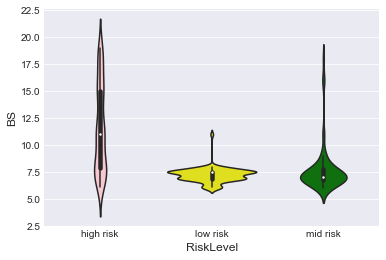

In [811]:
sns.violinplot (x = "RiskLevel", y = "BS", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='HeartRate'>

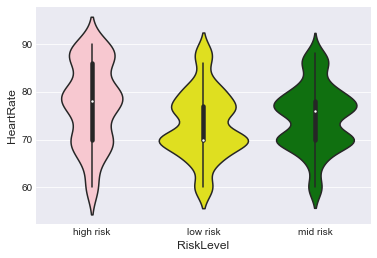

In [812]:
sns.violinplot (x = "RiskLevel", y = "HeartRate", data=df, palette = palette_maternity)

<AxesSubplot:xlabel='RiskLevel', ylabel='BodyTemp'>

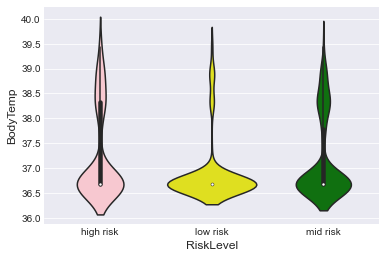

In [813]:
sns.violinplot (x = "RiskLevel", y = "BodyTemp", data=df, palette = palette_maternity)

In [814]:
y.value_counts(normalize=True)

low risk     0.379469
mid risk     0.349481
high risk    0.271050
Name: RiskLevel, dtype: float64

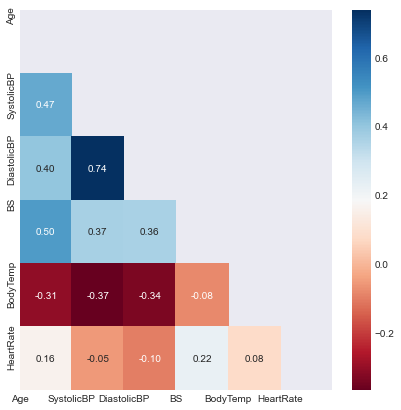

In [815]:
#calculamos el coeficiente de correlacion entre variables: 
correlacion=  df.corr(method='pearson')

#Sacamos la mitad que se repite
mask=np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(7,7))
#Generamos el heatmap
sns.heatmap(correlacion,annot=True, fmt='.2f', mask=mask,cmap='RdBu')
#x
plt.xticks(range(len(correlacion.columns)),correlacion.columns)
#y
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
#plot
plt.show()

In [816]:
y.value_counts(normalize=True)

low risk     0.379469
mid risk     0.349481
high risk    0.271050
Name: RiskLevel, dtype: float64

In [817]:
#Separamos variables target y features
X = df.drop(columns = 'RiskLevel')
y = df.RiskLevel

In [818]:
X.shape

(867, 6)

In [819]:
y.shape

(867,)

### Nuestro Train y Test

In [820]:
#Construimos los conjuntos de train y test, asignando el 70% de los registros a train y el 30% a test
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=127,stratify=df['RiskLevel'])

In [821]:
print(X_train.shape) 
print(X_test.shape)

(606, 6)
(261, 6)


In [822]:
#Probamos random forest balanced
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=127)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

### Modelo REGRESION LOGISTICA

---
Vamos a aplicar en todos los casos un modelo de Regresión Logística, y mediremos su performance.

Preparamos los datos:

In [823]:
# definimos una función que crea el modelo que usaremos cada vez
def run_model(X_train, y_train):
    clf_base = LogisticRegression(penalty='none',random_state=123,max_iter=500)
    clf_base.fit(X_train, y_train)
    return clf_base

In [824]:
# definimos una función para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y); 
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix,  annot=True, fmt="d");
    plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class')
    plt.show()

    print("METRICS")
    print (classification_report(y_test, pred_y))

### Modelo sin modificar el dataset

Apliquemos el modelo sobre el dataset original.

Observamos un *valor  bajo de accuracy (0.65)*. Pero los valores de *precision y recall* nos muestran que el modelo es *bueno prediciendo la clase low risk y mid risk*, pero **muy malo para la clase high risk** que es la que no mas importa. 

La matriz de confusión también nos indica un *valor alto de casos mal clasificados para la clase 1*.

In [825]:
scaler=StandardScaler()  
X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc=scaler.transform(X_test)

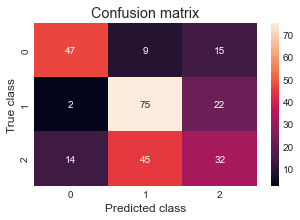

METRICS
              precision    recall  f1-score   support

   high risk       0.75      0.66      0.70        71
    low risk       0.58      0.76      0.66        99
    mid risk       0.46      0.35      0.40        91

    accuracy                           0.59       261
   macro avg       0.60      0.59      0.59       261
weighted avg       0.59      0.59      0.58       261



In [826]:
model_original = run_model(X_train_sc, y_train)
y_pred = model_original.predict(X_test_sc)
mostrar_resultados(y_test, y_pred)

### Modelo aplicando Undersampling

In [827]:
from imblearn.under_sampling import RandomUnderSampler
undersampler=RandomUnderSampler(sampling_strategy="not minority",random_state=127); # iguala las clases

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_us_sc=scaler.fit_transform(X_train_us) # Estandarizamos los datos     
X_test_us_sc=scaler.transform(X_test)

In [828]:
print('NUEVA Composición del training set:\n', y_train_us.value_counts())

NUEVA Composición del training set:
 low risk     164
high risk    164
mid risk     164
Name: RiskLevel, dtype: int64


In [829]:
print('ANTERIOR Composición del training set:\n', y_train.value_counts())

ANTERIOR Composición del training set:
 low risk     230
mid risk     212
high risk    164
Name: RiskLevel, dtype: int64


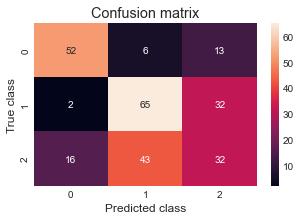

METRICS
              precision    recall  f1-score   support

   high risk       0.74      0.73      0.74        71
    low risk       0.57      0.66      0.61        99
    mid risk       0.42      0.35      0.38        91

    accuracy                           0.57       261
   macro avg       0.58      0.58      0.58       261
weighted avg       0.56      0.57      0.56       261



In [830]:
model_us = run_model(X_train_us_sc, y_train_us)
y_pred = model_us.predict(X_test_us_sc)
mostrar_resultados(y_test, y_pred)

### Modelo aplicando Oversampling

In [831]:
from imblearn.over_sampling import RandomOverSampler
oversampler=RandomOverSampler(sampling_strategy='not minority',random_state=127); # iguala las clases

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_os_sc=scaler.fit_transform(X_train_os) # Estandarizamos los datos     
X_test_os_sc=scaler.transform(X_test)

In [832]:
print('NUEVA Composición del training set:\n', y_train_os.value_counts())

NUEVA Composición del training set:
 low risk     230
mid risk     230
high risk    164
Name: RiskLevel, dtype: int64


In [833]:
print('ANTERIOR Composición del training set:\n', y_train.value_counts())

ANTERIOR Composición del training set:
 low risk     230
mid risk     212
high risk    164
Name: RiskLevel, dtype: int64


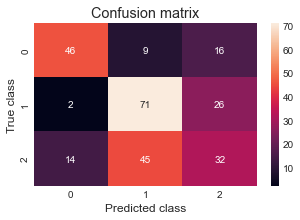

METRICS
              precision    recall  f1-score   support

   high risk       0.74      0.65      0.69        71
    low risk       0.57      0.72      0.63        99
    mid risk       0.43      0.35      0.39        91

    accuracy                           0.57       261
   macro avg       0.58      0.57      0.57       261
weighted avg       0.57      0.57      0.56       261



In [834]:
model_os = run_model(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados(y_test, y_pred)

### Modelo aplicando SMOTENC

In [836]:
X_train_cat=X_train
X_test_cat=X_test

In [837]:
from imblearn.over_sampling import SMOTENC

sm=SMOTENC(categorical_features=[5],k_neighbors=3,random_state=127)
X_train_sm,y_train_sm=sm.fit_resample(X_train_cat,y_train)

scaler=StandardScaler()  
X_train_sm_sc=scaler.fit_transform(X_train_sm) # Estandarizamos los datos     
X_test_sm_sc=scaler.transform(X_test)

In [838]:
print(X_test.shape)
#X_test

(261, 6)


In [839]:
print('NUEVA Composición del training set:\n', y_train_sm.value_counts())

NUEVA Composición del training set:
 low risk     230
mid risk     230
high risk    230
Name: RiskLevel, dtype: int64


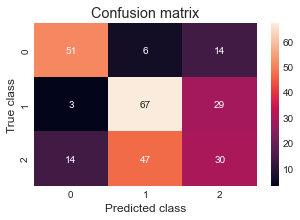

METRICS
              precision    recall  f1-score   support

   high risk       0.75      0.72      0.73        71
    low risk       0.56      0.68      0.61        99
    mid risk       0.41      0.33      0.37        91

    accuracy                           0.57       261
   macro avg       0.57      0.57      0.57       261
weighted avg       0.56      0.57      0.56       261



In [840]:
model_sm = run_model(X_train_sm_sc, y_train_sm)
y_pred = model_sm.predict(X_test_sm_sc)
mostrar_resultados(y_test, y_pred)

### Modelo aplicando Class weighting

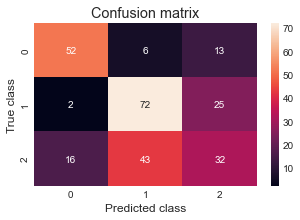

METRICS
              precision    recall  f1-score   support

   high risk       0.74      0.73      0.74        71
    low risk       0.60      0.73      0.65        99
    mid risk       0.46      0.35      0.40        91

    accuracy                           0.60       261
   macro avg       0.60      0.60      0.60       261
weighted avg       0.59      0.60      0.59       261



In [841]:
model = LogisticRegression(class_weight = 'balanced',penalty='none',random_state=127,max_iter=500)

scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train);
X_test_sc=scaler.transform(X_test);

model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)
mostrar_resultados(y_test, y_pred)

In [842]:
#Listado de los accuracy.
accuracy_modelos=[]

### Modelo aplicando KNN  + OVERSAMPLING / UNDERSAMPLING / CLASS WEIGHTING 

In [843]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [844]:
# definimos una función que crea el modelo que usaremos cada vez
def run_model_KNN(X_train, y_train):
    k_range = list(range(1, 31))
    weights_range = ["uniform","distance"]
    metric_range = ["euclidean","manhattan","chebyshev","minkowski","wminkowski","seuclidean","mahalanobis"]
    param_grid = dict(n_neighbors=k_range, weights = weights_range, metric = metric_range)
    folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy', n_jobs=4)
    grid.fit(X_train, y_train)
    
    accuracy_knn = grid.best_score_
    
    return grid

In [845]:
# definimos una función para mostrar los resultados
def mostrar_resultados_KNN(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y); 
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix,  annot=True, fmt="d");
    plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class')
    plt.show()

    print("METRICS")
    print (classification_report(y_test, pred_y))

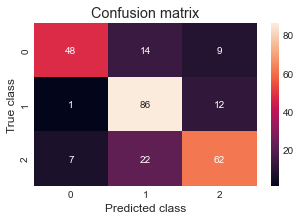

METRICS
              precision    recall  f1-score   support

   high risk       0.86      0.68      0.76        71
    low risk       0.70      0.87      0.78        99
    mid risk       0.75      0.68      0.71        91

    accuracy                           0.75       261
   macro avg       0.77      0.74      0.75       261
weighted avg       0.76      0.75      0.75       261



In [846]:
model_os = run_model_KNN(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados_KNN(y_test, y_pred)

In [847]:
accuracy_knn = run_model_KNN(X_train_os_sc, y_train_os).best_score_
accuracy_modelos.append(accuracy_knn)
accuracy_knn

0.8031490015360981

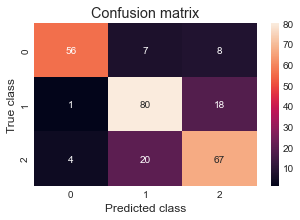

METRICS
              precision    recall  f1-score   support

   high risk       0.92      0.79      0.85        71
    low risk       0.75      0.81      0.78        99
    mid risk       0.72      0.74      0.73        91

    accuracy                           0.78       261
   macro avg       0.80      0.78      0.78       261
weighted avg       0.78      0.78      0.78       261



In [848]:
model_os = run_model_KNN(X_train_sc, y_train)
y_pred = model_os.predict(X_test_sc)
mostrar_resultados_KNN(y_test, y_pred)

In [849]:
accuracy_knn = run_model_KNN(X_train_sc, y_train).best_score_
accuracy_modelos.append(accuracy_knn)
accuracy_knn

0.8069945355191258

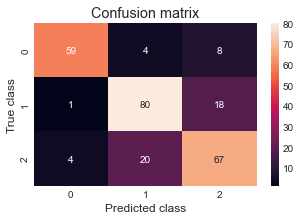

METRICS
              precision    recall  f1-score   support

   high risk       0.92      0.83      0.87        71
    low risk       0.77      0.81      0.79        99
    mid risk       0.72      0.74      0.73        91

    accuracy                           0.79       261
   macro avg       0.80      0.79      0.80       261
weighted avg       0.79      0.79      0.79       261



In [850]:
model_sm = run_model_KNN(X_train_sm_sc, y_train_sm)
y_pred = model_sm.predict(X_test_sm_sc)
mostrar_resultados_KNN(y_test, y_pred)

In [851]:
accuracy_knn = run_model_KNN(X_train_sm_sc, y_train_sm).best_score_
accuracy_modelos.append(accuracy_knn)
accuracy_knn

0.827536231884058

### Naive Bayes OVERSAMPLING / UNDERSAMPLING / CLASS WEIGHTING 

In [852]:
#Importamos librerías
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import warnings
import datetime
from sklearn.naive_bayes import GaussianNB

In [853]:
# definimos una función que crea el modelo que usaremos cada vez
def run_model_NAIVE_BAYES(X_train, y_train):
    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
        
    return gnb

In [854]:
# definimos una función para mostrar los resultados
def mostrar_resultados_NAIVE_BAYES(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y); 
    
    plt.figure(figsize=(5, 3))
    sns.heatmap(conf_matrix,  annot=True, fmt="d");
    plt.title("Confusion matrix"); plt.ylabel('True class'); plt.xlabel('Predicted class')
    plt.show()

    print("METRICS")
    print (classification_report(y_test, pred_y))

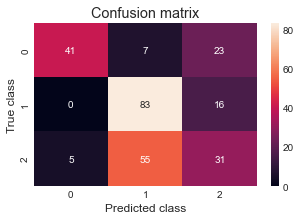

METRICS
              precision    recall  f1-score   support

   high risk       0.89      0.58      0.70        71
    low risk       0.57      0.84      0.68        99
    mid risk       0.44      0.34      0.39        91

    accuracy                           0.59       261
   macro avg       0.64      0.59      0.59       261
weighted avg       0.61      0.59      0.58       261



In [855]:
model_os = run_model_NAIVE_BAYES(X_train_os_sc, y_train_os)
y_pred = model_os.predict(X_test_os_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

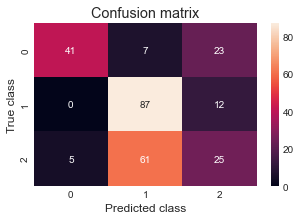

METRICS
              precision    recall  f1-score   support

   high risk       0.89      0.58      0.70        71
    low risk       0.56      0.88      0.69        99
    mid risk       0.42      0.27      0.33        91

    accuracy                           0.59       261
   macro avg       0.62      0.58      0.57       261
weighted avg       0.60      0.59      0.57       261



In [856]:
model_os = run_model_NAIVE_BAYES(X_train_sc, y_train)
y_pred = model_os.predict(X_test_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

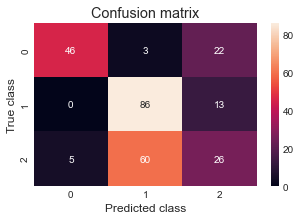

METRICS
              precision    recall  f1-score   support

   high risk       0.90      0.65      0.75        71
    low risk       0.58      0.87      0.69        99
    mid risk       0.43      0.29      0.34        91

    accuracy                           0.61       261
   macro avg       0.64      0.60      0.60       261
weighted avg       0.61      0.61      0.59       261



In [857]:
model_sm = run_model_NAIVE_BAYES(X_train_sm_sc, y_train_sm)
y_pred = model_sm.predict(X_test_sm_sc)
mostrar_resultados_NAIVE_BAYES(y_test, y_pred)

CONCLUSION:  EL MODELO QUE MEJORA EL ACCURACY Y PREDICT DE HIGH RISK ES <br>

EL MODELO DE OVERSAMPLING, POR ENDE USAR LOS X e Y TRAIN: <br>

X_train_os_sc<br> 
y_train_os
